In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)


In [4]:
df = pd.read_csv("train.csv")

# Basic preprocessing

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


PART 1 – REGRESSION

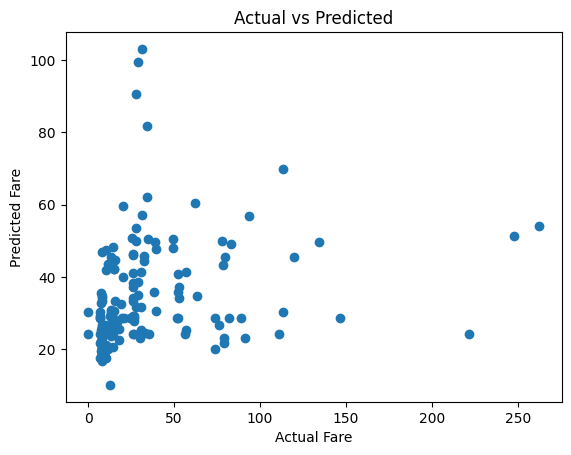

In [6]:
#Task 1 – Linear Regression
X_reg = df[['Age','SibSp','Parch']]
y_reg = df['Fare']

X_train, X_test, y_train, y_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42)

lr = LinearRegression()

lr.fit(X_train, y_train)

pred_reg = lr.predict(X_test)

plt.scatter(y_test, pred_reg)
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Actual vs Predicted")
plt.show()


PART 2 – REGRESSION METRICS

In [8]:
mae = mean_absolute_error(y_test, pred_reg)
mse = mean_squared_error(y_test, pred_reg)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

#MAE → average error
#MSE → penalizes large error
#RMSE → error in original unit


MAE: 23.990565316737303
MSE: 1432.8757467372736
RMSE: 37.85334525160588


PART 3 – CLASSIFICATION

In [10]:
X = df[['Age','Fare','Pclass','SibSp','Parch']]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

#Task 3 – Logistic Regression
log = LogisticRegression(max_iter=1000)

log.fit(X_train, y_train)

pred_log = log.predict(X_test)

#Task 4 – Naive Bayes
nb = GaussianNB()

nb.fit(X_train, y_train)

pred_nb = nb.predict(X_test)

#Task 5 – KNN (3 values)
for k in [3,5,7]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    p = knn.predict(X_test)

    print("K =",k,"Accuracy:", accuracy_score(y_test,p))




K = 3 Accuracy: 0.659217877094972
K = 5 Accuracy: 0.659217877094972
K = 7 Accuracy: 0.659217877094972


PART 4 – CLASSIFICATION METRICS

In [12]:
print("Logistic Regression Report")
print(classification_report(y_test, pred_log))

print("Naive Bayes Report")
print(classification_report(y_test, pred_nb))

print("Confusion Matrix - Logistic")
print(confusion_matrix(y_test, pred_log))



Logistic Regression Report
              precision    recall  f1-score   support

           0       0.72      0.90      0.80       105
           1       0.77      0.50      0.61        74

    accuracy                           0.73       179
   macro avg       0.74      0.70      0.70       179
weighted avg       0.74      0.73      0.72       179

Naive Bayes Report
              precision    recall  f1-score   support

           0       0.71      0.84      0.77       105
           1       0.69      0.51      0.59        74

    accuracy                           0.70       179
   macro avg       0.70      0.68      0.68       179
weighted avg       0.70      0.70      0.69       179

Confusion Matrix - Logistic
[[94 11]
 [37 37]]


Observation:
Logistic Regression gives higher accuracy than Naive Bayes.
Naive Bayes assumes feature independence, so performance is lower.


PART 5 – OVERFITTING & UNDERFITTING

In [13]:
# Underfitting model – simple
model_under = KNeighborsClassifier(n_neighbors=50)
model_under.fit(X_train, y_train)

# Overfitting model – complex
model_over = KNeighborsClassifier(n_neighbors=1)
model_over.fit(X_train, y_train)

print("Underfit Train:", model_under.score(X_train,y_train))
print("Underfit Test:", model_under.score(X_test,y_test))

print("Overfit Train:", model_over.score(X_train,y_train))
print("Overfit Test:", model_over.score(X_test,y_test))


Underfit Train: 0.6882022471910112
Underfit Test: 0.6983240223463687
Overfit Train: 0.949438202247191
Overfit Test: 0.6424581005586593


**TASK 8 – CONCEPTUAL ANSWERS**


### 1. What is bias in ML models?

* Bias is the error due to wrong or simple assumptions made by the model
* High bias means the model is too simple to capture patterns
* It leads to poor performance on both training and test data
* High bias usually causes underfitting



### 2. What is variance?

* Variance is how much the model changes with different training data
* High variance means the model is too sensitive to small changes
* It performs well on training data but poorly on test data
* High variance usually causes overfitting



### 3. How do bias and variance relate to underfitting and overfitting?

* High bias = model underfits the data
* High variance = model overfits the data
* Good model needs balance between bias and variance
* This balance is called the bias–variance tradeoff



### 4. How can we reduce overfitting?

* Use more training data
* Reduce model complexity
* Apply regularization techniques
* Use cross-validation
* Remove unnecessary features
* Use simpler algorithms

